<a href="https://colab.research.google.com/github/LauraWangQiu/GPUs/blob/main/src/lab4/Jupyter-notebooks/ejercicio_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento del dataset mnist
* Clasificación de un problema de escritura con **MNIST dataset** [^1]
* Cargamos el dataset importando con *mnist.load_data()*

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) Source: Wikipedia.


[^1]: https://en.wikipedia.org/wiki/MNIST_database

# Ejercicio
* Creación de nueva red neuronal y su evaluación para el dataset MNIST

![CNN example](https://drive.google.com/uc?id=1dpyEYquPdWkl8cFbvECYP87bYgpamGq9)

Num GPUs Available:  1
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8042 - loss: 0.6139 - val_accuracy: 0.9799 - val_loss: 0.0623
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9691 - loss: 0.0969 - val_accuracy: 0.9869 - val_loss: 0.0406
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9795 - loss: 0.0681 - val_accuracy: 0.9895 - val_loss: 0.0318
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9830 - loss: 0.0548 - val_accuracy: 0.9913 - val_loss: 0.0274
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9864 - loss: 0.0467 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9924 - val_loss: 0.0241
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9889 - loss: 0.0338 - val_accuracy: 0.9914 - val_loss: 0.0237
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0

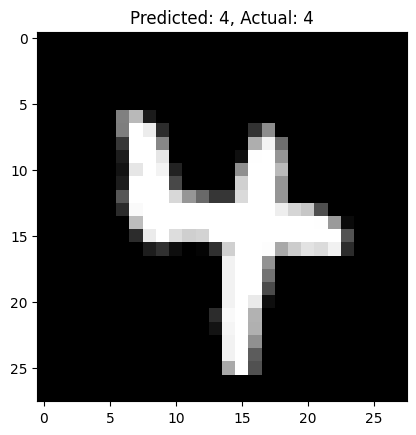

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Cargamos el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos las imágenes al rango [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Redimensionamos las imágenes para que tengan un canal (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convertimos las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definimos el modelo CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

# Evaluamos el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Visualizamos una predicción
import numpy as np
import random

id_random = random.randint(0, x_test.shape[0])
test_im = x_test[id_random]
pred = model.predict(test_im.reshape(1, 28, 28, 1), batch_size=1, verbose=0)

plt.imshow(test_im.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(pred)}, Actual: {np.argmax(y_test[id_random])}")
plt.show()